# Assignment I: EDA
### Ranfei Xu

In [1]:
import pandas as pd
import numpy as np

# read data
dt = pd.read_csv('E:/22FALL/AD654/lobster22.csv')

# EDA

#### A. Call the head() function on this dataframe and look at your results

In [2]:
dt.head()

,Date,Weekday,LowTemp,HighTemp,DayPass,TotalPax,Precip,MerchRev,SnackRev,LobsteramaRev,GoldZoneRev,CSD_Complaints,Ridership,TotalRev
0,May 30,Monday,53,82,5471,6999,0,56838.04,28032.0,35838.53,27437.39,10,28068,168826.54
1,May 31,Tuesday,50,72,2887,4082,T,33148.98,15200.0,20904.45,15999.55,6,16370,98453.38
2,June 1,Wednesday,50,59,3258,4424,0.03,35923.44,18132.0,22649.05,17341.59,1,17739,106697.74
3,June 2,Thursday,51,64,6430,7167,0.23,58198.77,29888.0,36693.66,28095.16,8,28740,172868.15
4,June 3,Friday,50,55,5981,6388,0.12,51873.00,21648.0,32711.07,25038.58,7,25615,154067.45


#### B. How many rows of the dataset are visible in Jupyter now?

Answer: According to QA, 5 rows are visible in Jupyter now.

#### C. Take a look at the dataset’s shape attribute. 

a. How many rows, and how many columns, are in this entire dataframe?

In [3]:
dt.shape

(99, 14)

Answer: There are 99 rows and 14 columns in this entire dataframe.

#### D. Read the dataset description, and take a look at the variables in the dataset.

a. Which of your variables should be seen as categorical, and which ones should be seen as numeric?

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            99 non-null     object 
 1   Weekday         99 non-null     object 
 2   LowTemp         99 non-null     int64  
 3   HighTemp        99 non-null     int64  
 4   DayPass         99 non-null     int64  
 5   TotalPax        99 non-null     int64  
 6   Precip          99 non-null     object 
 7   MerchRev        99 non-null     float64
 8   SnackRev        99 non-null     float64
 9   LobsteramaRev   99 non-null     float64
 10  GoldZoneRev     99 non-null     float64
 11  CSD_Complaints  99 non-null     int64  
 12  Ridership       99 non-null     int64  
 13  TotalRev        97 non-null     float64
dtypes: float64(5), int64(6), object(3)
memory usage: 11.0+ KB


Answer: Variable'Weekday'should be seen as categorical, while the others excluding variable 'Date' should be seen as numeric. Although there are some 'T' in 'Precip'column, we will fix it to numeric later.

#### E. Replace the ‘T’ values with a suitable numeric alternative so that this variable can be seen by pandas as numeric.

In [5]:
# replavce T with value 0.01
dt.Precip.replace('T', 0.01, inplace=True) 
dt['Precip'] = dt['Precip'].astype('float64')

In [6]:
# check 
len([value for value in dt.Precip if value == 'T'])

0

#### F. Lobster Land management just realized that they forgot a couple of things here.

a. Add a column for “Passholders”

In [7]:
dt['Passholders']=dt['TotalPax']-dt['DayPass']
dt.head()

,Date,Weekday,LowTemp,HighTemp,DayPass,TotalPax,Precip,MerchRev,SnackRev,LobsteramaRev,GoldZoneRev,CSD_Complaints,Ridership,TotalRev,Passholders
0,May 30,Monday,53,82,5471,6999,0.00,56838.04,28032.0,35838.53,27437.39,10,28068,168826.54,1528
1,May 31,Tuesday,50,72,2887,4082,0.01,33148.98,15200.0,20904.45,15999.55,6,16370,98453.38,1195
2,June 1,Wednesday,50,59,3258,4424,0.03,35923.44,18132.0,22649.05,17341.59,1,17739,106697.74,1166
3,June 2,Thursday,51,64,6430,7167,0.23,58198.77,29888.0,36693.66,28095.16,8,28740,172868.15,737
4,June 3,Friday,50,55,5981,6388,0.12,51873.00,21648.0,32711.07,25038.58,7,25615,154067.45,407


b. Find the day for which the high temperature and low temperature got reversed, and fix this error by reversing the two temperature values.

In [8]:
# why not works?
# dt['check'] = np.where((dt['LowTemp'] > dt['HighTemp']), False, True)
# rslt_df = dt.loc[dt['check'] == 'False']
# print('\nResult dataframe :\n', rslt_df)

In [9]:
dt['check'] = dt['HighTemp'] - dt['LowTemp']
rslt_df = dt.loc[dt['check'] < 0 ]
print('\nResult dataframe :\n', rslt_df)


Result dataframe :
        Date   Weekday  LowTemp  HighTemp  DayPass  TotalPax  Precip  MerchRev  \
12  June 11  Saturday       74        51     6905      8045     0.0  65332.48   

    SnackRev  LobsteramaRev  GoldZoneRev  CSD_Complaints  Ridership  \
12   26832.0       41196.76     31539.98               7      32263   

     TotalRev  Passholders  check  
12  194050.94         1140    -23  


In [10]:
dt.loc[12,['HighTemp','LowTemp']] = (74,51)
# why not work: dt.loc[12,['HighTemp','LowTemp']] = dt.loc[12,['LowTemp','HighTemp']]
# work: dt.iloc[12,[3,2]] = dt.iloc[12,[2,3]]
# check
dt.loc[12,['HighTemp','LowTemp']]

HighTemp    74
LowTemp     51
Name: 12, dtype: object

#### G.  Find the standard deviation of MerchRev and the standard deviation of GoldZoneRev.

a. What are these values?

In [11]:
dt['MerchRev'].std()
#not work:dt['MerchRev','GoldZoneRev'].std()

15407.183412905959

In [12]:
dt['GoldZoneRev'].std()

10422.459761616836

b. Now, find the coefficient of variation (CV) for SnackRev and for GoldZone Rev.

In [13]:
import scipy.stats as sp
sp.variation(dt['SnackRev'],nan_policy = 'omit')

0.32539340667783384

In [14]:
sp.variation(dt['GoldZoneRev'],nan_policy = 'omit')

0.42632333648999887

Answer: The CV for SnakcRev is 0.33, and the CV for GoldZoneRev is  0.42. The reason we use coefficient of variation is that we can use it to compare the variation/dispersion between two sample with different scale.

#### H. Can NaNs in a dataset ever indicate something about an observation? Or do they represent a complete ‘void’ of information?

Answer: I think NaNs can sometime indicate something about an observation especially when it relate to other variables. For example, as I practiced above, I add a colomn to check whether the HighTemp and LowTemp are reversed, if we set the condition as returning NaN if HighTemp is lower than LowTemp, then we can sort out the reversed data by locating the NaN value.

#### I. Are there any missing values in this dataset? If so, how many total values are missing, and from which column are they missing? Use Python code to answerthis question.

a. It might be tempting at first to think that we can quickly fix this issue by using known values from other columns. However, why won’t such an approach work with this particular dataset?

In [15]:
print(dt.isnull().sum())

Date              0
Weekday           0
LowTemp           0
HighTemp          0
DayPass           0
TotalPax          0
Precip            0
MerchRev          0
SnackRev          0
LobsteramaRev     0
GoldZoneRev       0
CSD_Complaints    0
Ridership         0
TotalRev          2
Passholders       0
check             0
dtype: int64


Answer: There are two NaN value in column TotalRev, it seems like to be the sum of ohter revenue data in the existing data set, but after calcualting, it turns out that TotalRev also includes some other revenue which is not record in the dataset, thus we cannot fix this issue by using known values from other columns.

#### J. Renaming a variable.

In [16]:
dt.rename(columns={"CSD_Complaints": "ncpl"}, inplace = True)
dt.head()

,Date,Weekday,LowTemp,HighTemp,DayPass,TotalPax,Precip,MerchRev,SnackRev,LobsteramaRev,GoldZoneRev,ncpl,Ridership,TotalRev,Passholders,check
0,May 30,Monday,53,82,5471,6999,0.00,56838.04,28032.0,35838.53,27437.39,10,28068,168826.54,1528,29
1,May 31,Tuesday,50,72,2887,4082,0.01,33148.98,15200.0,20904.45,15999.55,6,16370,98453.38,1195,22
2,June 1,Wednesday,50,59,3258,4424,0.03,35923.44,18132.0,22649.05,17341.59,1,17739,106697.74,1166,9
3,June 2,Thursday,51,64,6430,7167,0.23,58198.77,29888.0,36693.66,28095.16,8,28740,172868.15,737,13
4,June 3,Friday,50,55,5981,6388,0.12,51873.00,21648.0,32711.07,25038.58,7,25615,154067.45,407,5


# Data Visualization

#### K. Using any plotting tool in Python, generate a histogram that shows the distribution of Lobsterama Revenue.

a. What do you notice about this relationship? In a couple of sentences, how would you describe what you see here?

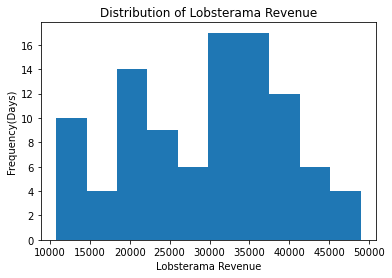

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist( x ='LobsteramaRev', data = dt);
plt.title('Distribution of Lobsterama Revenue');
plt.xlabel('Lobsterama Revenue');
plt.ylabel('Frequency(Days)');

Answer: It is hard to find a pattern of any distribution in this plot. But we can notice that there is a tendency for data to concentrate around different value.

b. Now, increase the number of bins. What can you say about this second histogram, compared with the first one?

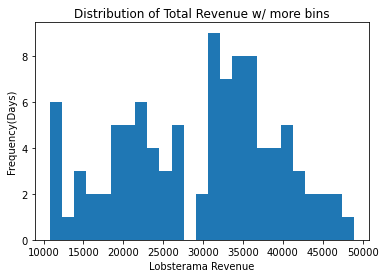

In [18]:
plt.hist(x ='LobsteramaRev', bins = 25, data = dt);
plt.title('Distribution of Total Revenue w/ more bins');
plt.xlabel('Lobsterama Revenue');
plt.ylabel('Frequency(Days)');

Answer: After increasing the number of bins, we can see the data is clustered around two values. One of them is concentrated around 20,000, the other is concentrated around 35,000. We can speculate that the two clusters may be caused by some binary variables like w/ or wo/ precipitation, on weekdays or on weekends, etc.

c. Generate one more histogram – this time, show the LobsteramaRev distribution (with any number of bins) – but add a new twist. Assume that ‘weekend’ includes Friday, Saturday, and Sunday, and that ‘Weekday’ refers to all the other days. Fill the bars of your histogram based on whether the day is a weekend or a weekday. What does this plot show, and why (or why not) would you expect it to look the way it does?

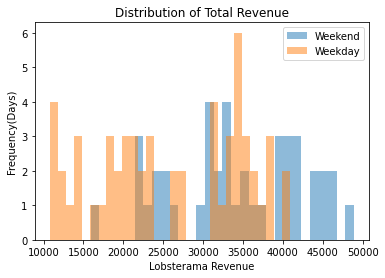

In [19]:
x = dt[dt['Weekday'].isin(['Friday','Saturday','Sunday'])]
y = dt[~dt['Weekday'].isin(['Friday','Saturday','Sunday'])]

plt.hist(x ='LobsteramaRev', bins = 30, alpha=0.5, label='Weekend', data = x);
plt.hist(x ='LobsteramaRev', bins = 30, alpha=0.5, label='Weekday', data = y);
plt.title('Distribution of Total Revenue');
plt.xlabel('Lobsterama Revenue');
plt.ylabel('Frequency(Days)');
plt.legend(loc='upper right')
plt.show()

Answer: After adding a new twist to distinguish weekday and weekend, we can see whether it is in the weekend can truly be a differentiating factor of Lobsterama Revenue.

#### L. Which items generated the most total revenue? Generate a bar plot that shows the total revenue for each of the individual revenue items included in this dataset (don’t include total). Sort the bars in order (tallest to shortest, or shortest to tallest).

a. In a sentence or two, what does this plot show?

<AxesSubplot:>

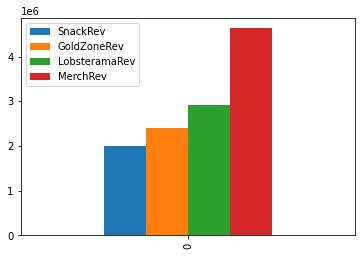

In [20]:
rev = dt[["LobsteramaRev", "MerchRev", "SnackRev", "GoldZoneRev"]].sum(axis=0)
pd.DataFrame(rev.sort_values()).transpose().plot(kind="bar")

Answer: As the plot shows above, the total merchandise revenue contributes the most to total revenue.

#### M. Can the number of visitors predict the number of complaints? Build a scatterplot to check for this. Use the total number of visitors as your explanatory variable, and use the total number of complaints as your response variable.

a. In a sentence or two, what does this plot show? Offer some speculation/insight about why it might look the way it does.

Text(0.5, 1.0, 'Total # of visitors vs. # of complaints')

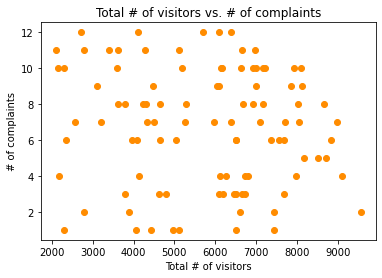

In [21]:
plt.scatter(x='TotalPax', y='ncpl', data = dt, color='darkorange')
plt.xlabel('Total # of visitors')
plt.ylabel('# of complaints')
plt.title('Total # of visitors vs. # of complaints')

Answer: The points in the plot above are scattered randomly, which indicates it is hard to tell that there is a relationship between the number of visitors and complaints. Maybe because the scale of these two variables has a huge gap.

#### N. How does rain impact park operations? Let’s compare days that did have some rain vs. days that had no rain.

a. Create a categorical variable that separates days with rain from days that had no rain. Next, generate an appropriate visualization to demonstrate a comparison of GoldZone revenue on rainy days vs. non-rainy days. What does it show? Why might it look the way it does?

<AxesSubplot:xlabel='rain', ylabel='GoldZoneRev'>

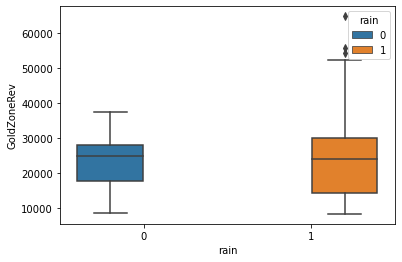

In [22]:
# create a categorical variable
dt['rain'] = np.where(dt['Precip'] <= 0.01, 0, 1)
dt['rain'] = dt['rain'].astype('category')
# boxplots for rainy day and non-rainy day (with different colors)
sns.boxplot(data = dt, x = "rain", y = 'GoldZoneRev', hue='rain')

Answer: It seems there is no significant difference in GoldZone revenue on rainy days vs. non-rainy days. Maybe because GoldZone is an in-house arcade that is hardly affected by the weather.

b. Now, generate an appropriate visualization to demonstrate a comparison of Ridership on rainy days vs. non-rain days. What does it show? Why might it look the way it does?

<AxesSubplot:xlabel='rain', ylabel='Ridership'>

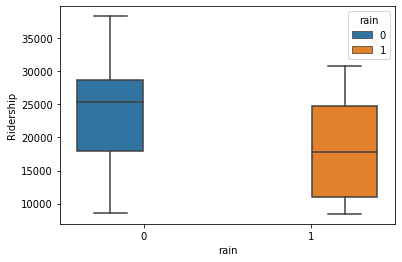

In [23]:
sns.boxplot(data = dt, x = "rain", y = 'Ridership', hue='rain')

Answer: There is an obvious difference in Ridership on rainy days vs. non-rainy days. It make sense because if it is rainy outside visitors may not transfer a lot.

c. To know about the impact of rain on a particular day, what else would be important to know, besides what’s shown here in the dataset and description? (Note that Lobster Land is open each day of operation from 9 a.m. to 9 p.m.)

Answer: To know the impact of rain on a particular day, I think we need to know the detaied rainy hours. Since our rainfall data is for 24-hour period of the day, but only 9 a.m. to 9 p.m. can has real effect.

# Wildcard: Metrics and 'Quantified Self'

I choose my weight as my observational object and gather the data from the app used to connect my bluetooth weight scale. 

| Date | Time | Weight(kg) |
| --- | --- | --- |
| 09/22 | 11:16 | 57.8 |
| 09/22 | 10:53 | 58.3 |
| 09/21 | 23:49 | 59.0 |
| 09/21 | 10:24 | 58.5 |
| 09/20 | 18:26 | 59.4 |

The result kind of astonished me at first, because I haven't weighed myself since I move into the new house on September 1st, and the weight showed up as 5 kg more than the stable weight I keep for the whole summer vacation. 

Two main reasons come to my mind. The first one is that I miss a lot of exercise time since I have audited many classes to make the final choice. The second one is that I caught a severe cold the second week and I drink a lot of water every day since then which makes me feel swollen. And maybe it's also because I took the Emergan-C (strawberry-kiwi flavor) as a vitamin supplement every day and it contains 5 added sugar per packet which is so different from my regular diet! 

I will keep tracking my weight since it seems to begin to regress (I wish). And I think my original and stable weight will keep me physically and mentally healthy. I'm really looking forward to this after I begin to exercise again!




